# An Informal Description of the Exposure Language

## Overview

Exposure is a domain-specific language designed around the features of AMIDOL with the goals of simplifying the process of working with models programmatically compared with the use of a general purpose language like Python.  The current implementation of Exposure is a research prototype and as such it lacks a formal definition, so the following discussion will more informally describe the features of the implementation for a few modeling tasks.  Furthermore, this discussion presupposes some familiarity with some of the other features of AMIDOL such as the Easel model specification language.

Note that many of the examples may use objects defined earlier sections of the notebook, so refer to previous sections if a definition appears to be missing.

## Expressions and Values

Exposure supports a familiar expression and statement syntax for mathematical and logical operations.  In the notebook environment, the value computed by an expression will be printed by default.

In [1]:
2 + 3 * 4

14

Exposure supports arrays of values as well:

In [2]:
[1,2,3,4]

[1, 2, 3, 4]

Some operations are implicitly lifted over arrays: 

In [3]:
2 * [1,2,3,4]

[2, 4, 6, 8]

The  `[n .. m by k]` syntax is a shorthand for writing arithmetic seqeuences as arrays:

In [4]:
[0 .. 120 by 5]

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]

Points, which are similar to maps or dictionaries in other languages, can be introduced using the `{{ .. }}` syntax

In [5]:
point = {{ x = 5, y = 6 }}

And particular sub-values of points can be accessed using dot notation:

In [6]:
point.x

5

Built-in functions can be applied using a syntax not unlike the one used in math:

In [7]:
max([1,2,3,4,5])

5

Values can also be bound to variables that can be used in subsequent computations:

In [8]:
a = 5 * 6

In [9]:
a + a

60

## Data Visualization

Exposure can create visualize data using the `plot` command, which takes a set of series and plots them.

A series can be defined using the `series` function - which takes an array of data, a series label, and a block of style  which can be `"lines"` or `"points"`:

In [10]:
series1 = series([0..120 by 5], "Series 1", {{ style = "lines" }})
series2 = series(2 * [0..120 by 5], "Series 2", {{ style = "points" }})

A plot can be made of these series using the `plot` function which takes:

- The title of the plot
- An array of series to plot
- An array of values to use as an x-axis of the plot
- The label to use for the x-axis


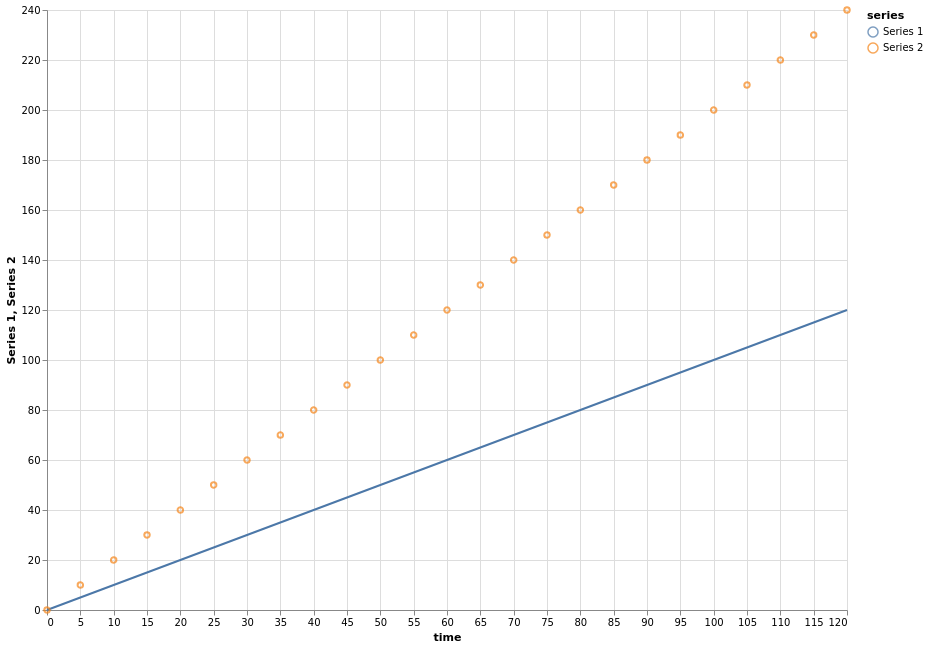

In [11]:
plot("Simple Plot", [series1, series2], [0..120 by 5], "time")

Because the x-axis is specified explicitly, `plot` can also be used to make scatterplots:

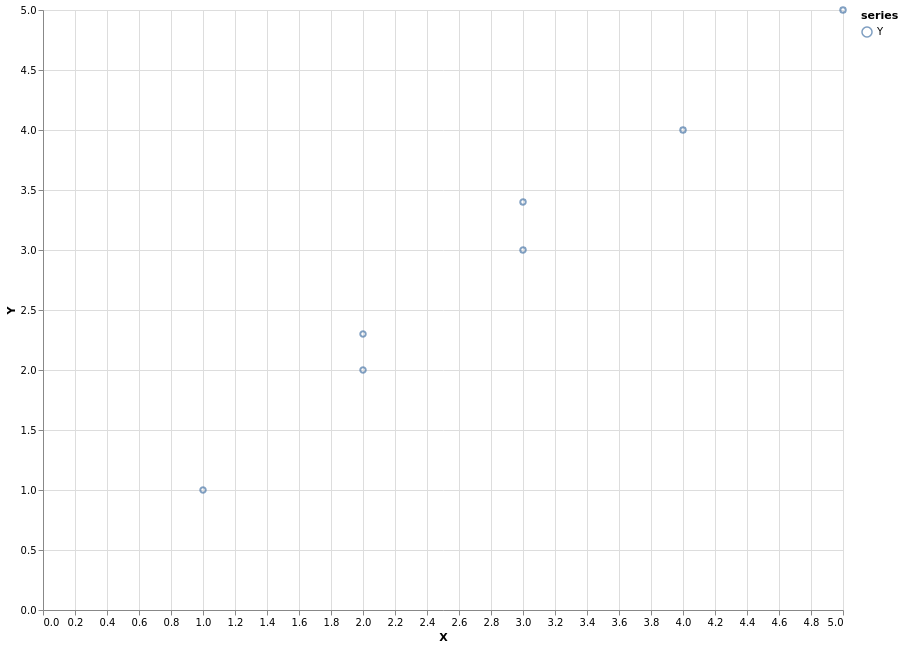

In [12]:
scatter1_series = series([1,2,2.3,3,3.4,4,5], "Y", {{ style="points" }})
scatter_x = [1,2,2,3,3,4,5]
plot("Simple Scatterplot", [scatter1_series], scatter_x, "X")

Since many models are also probabilistic, it is often useful to visualize a _distribution_ of values.  Exposure support this through the `histogram` function which takes an array of values and a number of buckets to distribute the values among:

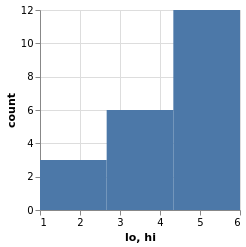

In [13]:
histogram([1,2,2,3,3,3,4,4,4,5,5,5,5,5,6,6,6,6,6,6,6], 3)

Exposure can also display data in a tabular form - the `table` function is applied to:

- An array of column names
- An array of arrays of values representing the data

In [14]:
table(["X", "2*X"], [[1,2,3,4,5], 2*[1,2,3,4,5]])

|X|2*X|
|---|---|
|1|2|
|2|4|
|3|6|
|4|8|
|5|10|

## Creating and Loading Models

Exposure allows for reaction networks can be declared inline using the `define`/`end` syntax:

In [15]:
define sir
    let beta = 0.2
    let gamma = 0.04
    

    let S = 997.0
    let I = 3.0
    let R = 0.0

    let N = S + I + R


    beta/N,  S + I --> 2I
    gamma,   I     --> R
end

We can also get more information about models such as their general size:

In [16]:
modelSize(sir)

states: 3   events: 2

And the states and parameters of the model:

In [17]:
describeModel(sir)

|Name|State/Param|Data Type|Value|
|---|---|---|---|
|I_init|parameter|Real|3.0|
|R_init|parameter|Real|0.0|
|S_init|parameter|Real|997.0|
|beta|parameter|Real|0.2|
|gamma|parameter|Real|4.0e-2|
|I|state|Real|I_init|
|R|state|Real|R_init|
|S|state|Real|S_init|
|N|state|Real|S + I + R|

The flow of population from compartment to compartment can be be rendered as a graphs:

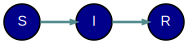

In [18]:
modelGraph(sir)

Additionally, models can be loaded from descriptions in external files - and can be used exactly like models specified inline:

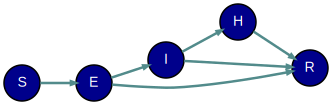

|Name|State/Param|Data Type|Value|
|---|---|---|---|
|beta|parameter|Real|0.8|
|delta|parameter|Real|1.0e-2|
|epsilon|parameter|Real|2.0e-2|
|gamma|parameter|Real|4.0e-2|
|kappa|parameter|Real|0.6|
|lambda|parameter|Real|0.2|
|E|state|Real|3.0|
|H|state|Real|0.0|
|I|state|Real|0.0|
|R|state|Real|0.0|
|S|state|Real|997.0|
|N|state|Real|S + I + H + E + R|

In [19]:
seirh = loadESL("models/seirh.easel")
modelGraph(seirh)
describeModel(seirh)

## Model Simulation

The mean behavior of a model can be simulated using the `simulate` function, which takes a model labelled with a set of times we are interested in measuring:

In [20]:
times = [0..80 by 1]
seirh_sim = simulate(seirh at times)

The result of `simulate` gives us an array of timed points, we can use the `value` function to get the values of these points, and the `time` function to get an array of the relevant times (which should be the same as the `times` variable above.  Using these tools we can plot the simulation results:

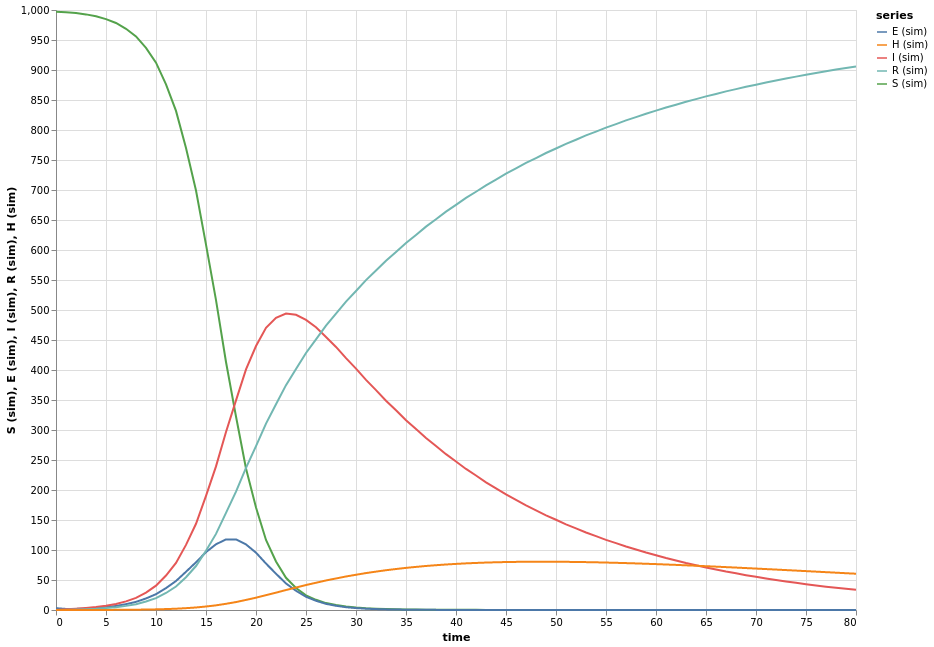

In [21]:
seirh_sim_S_series = series(value(seirh_sim.S), "S (sim)", {{ style="lines"}})
seirh_sim_E_series = series(value(seirh_sim.E), "E (sim)", {{ style="lines"}})
seirh_sim_I_series = series(value(seirh_sim.I), "I (sim)", {{ style="lines"}})
seirh_sim_R_series = series(value(seirh_sim.R), "R (sim)", {{ style="lines"}})
seirh_sim_H_series = series(value(seirh_sim.H), "H (sim)", {{ style="lines"}})
plot("seirh sim", [seirh_sim_S_series, seirh_sim_E_series, seirh_sim_I_series, seirh_sim_R_series, seirh_sim_H_series], time(seirh_sim), "time")

Note that we can re-use series we have defined across multiple plots to just examine the values we're interested in:

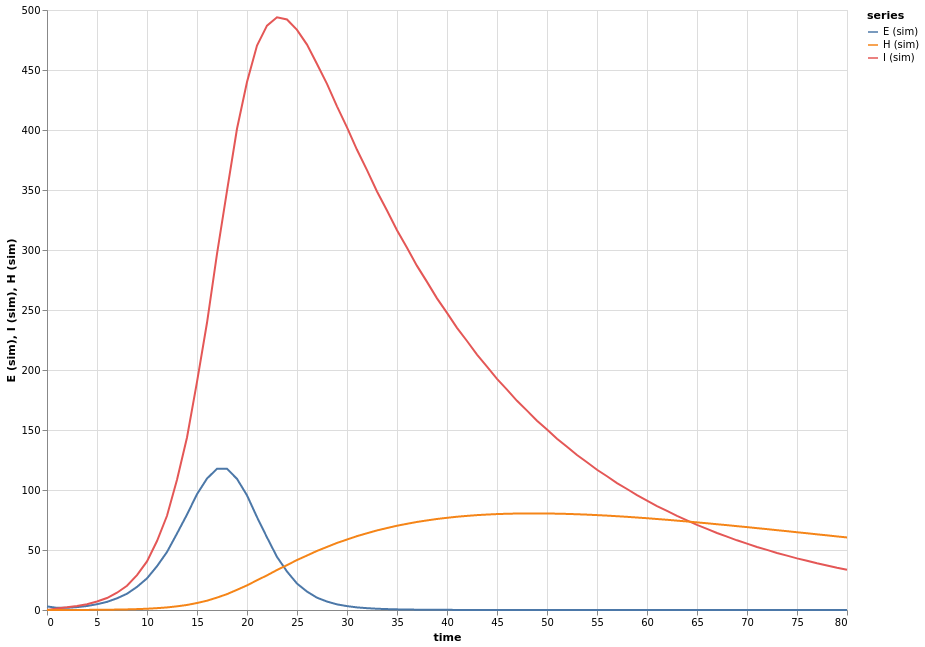

In [22]:
plot("seirh sim EIH", [seirh_sim_E_series, seirh_sim_I_series, seirh_sim_H_series], time(seirh_sim), "time")

## Sampling

`simulate` by itself can only describe the mean behavior of a system - if we want to delve deeper into a model's statistical behavior we use `sample` instead.  This gives us an array of points, each value of which contains a timed array of samples for each model state.

Similarly to `simulate`, `sample` take a model labelled with times of interest but takes an additional argument for the number of samples - here we take 200 samples of the `seirh` model at `times`.  Naturally this takes longer than using `simulate`.

In [23]:
seirh_samples = sample(seirh at times, 200)

We can filter the data down to what we're interested.  For example, to see the sampled values of `I` at time 30:

In [24]:
seirh_samples.I at 30

[385, 375, 404, 427, 352, 410, 414, 455, 487, 418, 375, 454, 391, 334, 419, 392, 404, 411, 437, 369, 361, 441, 404, 400, 414, 485, 443, 488, 395, 453, 334, 403, 392, 0, 366, 404, 414, 430, 460, 422, 454, 436, 475, 512, 372, 397, 423, 470, 494, 391, 372, 462, 430, 0, 428, 368, 363, 366, 484, 498, 361, 350, 382, 456, 471, 428, 360, 377, 370, 423, 459, 402, 462, 454, 417, 372, 451, 374, 421, 408, 404, 382, 369, 454, 422, 421, 398, 413, 470, 362, 435, 0, 429, 384, 397, 516, 409, 410, 370, 435, 360, 389, 438, 486, 415, 374, 361, 400, 392, 354, 373, 411, 411, 439, 481, 501, 476, 465, 389, 405, 494, 464, 438, 395, 468, 435, 397, 439, 376, 432, 432, 404, 436, 362, 0, 366, 399, 374, 420, 418, 418, 473, 443, 377, 386, 411, 442, 496, 426, 364, 377, 400, 389, 331, 462, 491, 389, 0, 442, 414, 362, 432, 469, 403, 389, 406, 424, 396, 435, 486, 402, 422, 471, 460, 442, 407, 410, 378, 412, 445, 438, 404, 401, 367, 453, 356, 439, 409, 365, 459, 470, 382, 358, 432, 430, 520, 468, 391, 0, 121]

Of course, it might make more sense to plot this as a histogram - it is much easier to see some of the values around 0 which the model produces from time to time:

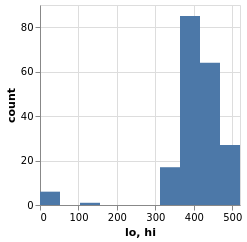

In [25]:
histogram(seirh_samples.I at 30, 10)

Given this set of samples, we can also measure the probability of an event - for example the probablity that `I` is greater than 400 at time=30:

In [26]:
P(seirh_samples.I > 400 at 30)

0.615

We can also compute simple statistics from this set of samples:

In [27]:
I_at_30 = seirh_samples.I at 30
mean(I_at_30)
max(I_at_30)
min(I_at_30)

403.045

520

0

Recall that many operations are lifted over arrays, this is also the case for `min`, `mean`, and `max` in the case of arrays of arrays:

In [28]:
max([[1,2,3], [4,5,6], [7,8,9]])

[3, 6, 9]

This allows us to easily compute the sample max for each sample we have at `I` and display a line showing the maximum sampled value for each point in time in the set of samples:

In [29]:
seirh_I_max_series = series(value(max(seirh_samples.I)), "I (max)", {{ style = "lines" }})

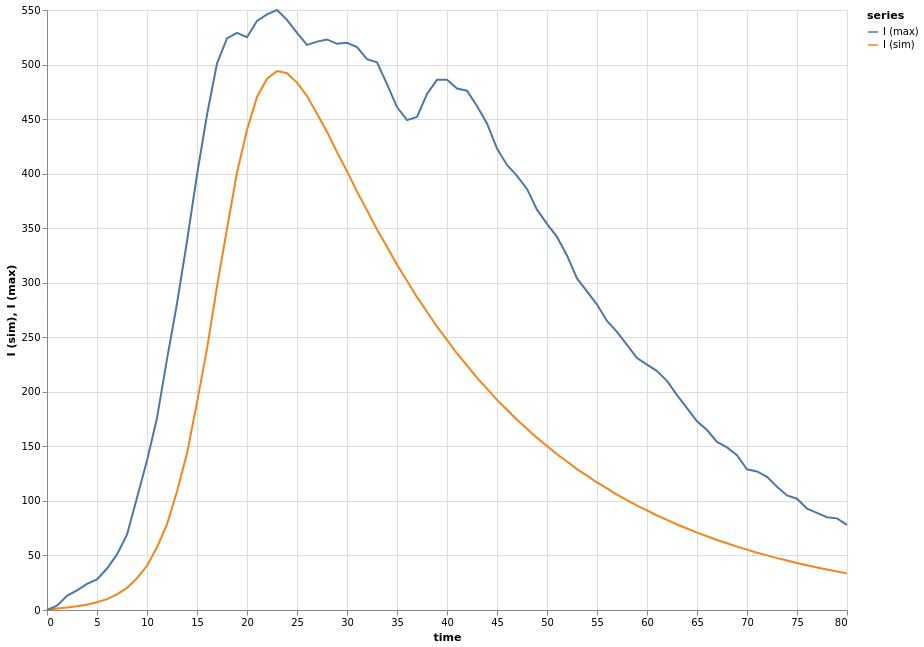

In [30]:
plot("seirh I sim vs. max", [seirh_sim_I_series, seirh_I_max_series], times, "time")

As an experimental feature, the implementation also contains a measurement `at peak` which measures a model's behavior at the maximum value of one of its values.  Here we are interested in the state of the model when the `H` variable (representing the hospitalized population) is at its peak:

In [31]:
peak_H_samples = sample(seirh at peak H over times, 200)

The resulting samples are do not line up in time, for example, here we see the values of `H` along with the associated time (after the `@`) when `H` is at its peak:

In [32]:
peak_H_samples.H

[86 @ 45.1944, 96 @ 43.4558, 84 @ 52.0213, 88 @ 53.8021, 93 @ 54.0263, 87 @ 50.9822, 90 @ 44.3726, 71 @ 51.2874, 85 @ 50.434, 101 @ 41.4243, 78 @ 53.9675, 86 @ 50.7984, 82 @ 51.4638, 83 @ 43.0979, 98 @ 51.2161, 1 @ 2.10133, 87 @ 42.9544, 84 @ 47.3561, 99 @ 42.4071, 72 @ 48.2007, 81 @ 47.3705, 0 @ 0, 96 @ 49.6126, 79 @ 47.4442, 84 @ 47.8611, 84 @ 45.6213, 86 @ 48.5214, 77 @ 42.2418, 89 @ 47.0825, 90 @ 55.466, 91 @ 51.2111, 81 @ 45.57, 99 @ 49.8188, 90 @ 48.4273, 86 @ 50.9148, 1 @ 1.3685, 93 @ 52.4908, 89 @ 43.0041, 78 @ 43.3336, 82 @ 52.5571, 78 @ 48.3215, 75 @ 44.3209, 90 @ 45.456, 101 @ 46.5198, 74 @ 52.8844, 81 @ 54.4861, 80 @ 38.729, 67 @ 40.1602, 101 @ 41.8377, 81 @ 41.6961, 83 @ 39.426, 72 @ 46.9631, 71 @ 47.1309, 93 @ 45.6528, 84 @ 55.6799, 91 @ 39.7974, 94 @ 57.6736, 78 @ 50.3176, 87 @ 47.4903, 79 @ 38.1666, 74 @ 43.2058, 86 @ 64.5294, 86 @ 48.6915, 74 @ 40.7238, 93 @ 35.2877, 82 @ 44.8838, 80 @ 48.2979, 93 @ 45.8349, 92 @ 51.0984, 83 @ 42.5986, 95 @ 45.4259, 73 @ 38.0805, 82 @ 

This is a good candidate for a scatterplot - we plot `H` vs the associated time and get a cloud of points showing the distribution of the peaks of `H` vs time:

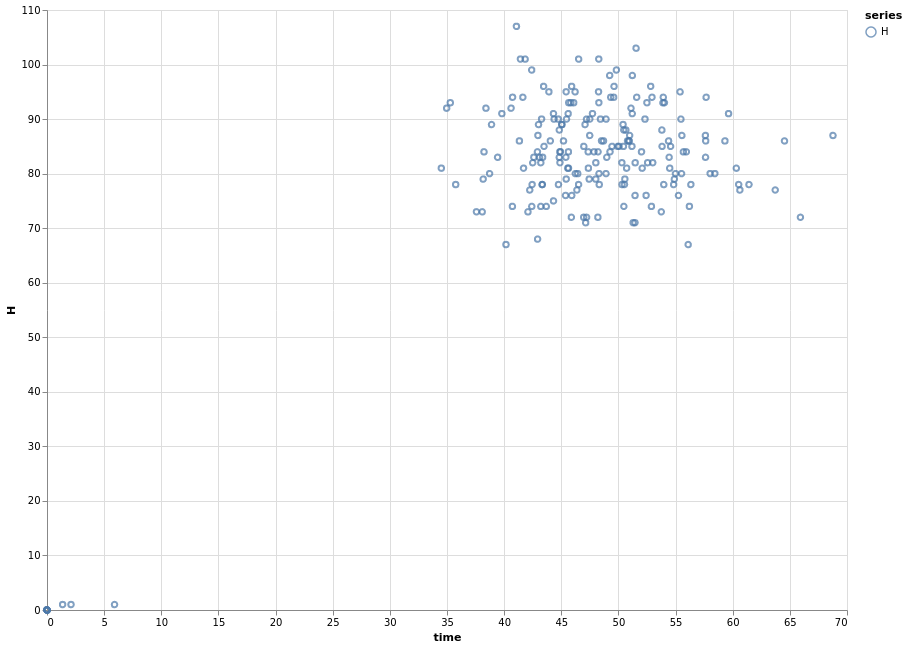

In [33]:
peak_H_series = series(value(peak_H_samples.H), "H", {{ style="points" }})
plot("H vs time", [peak_H_series], time(peak_H_samples), "time")

All of the same statistical machinery can be used to analyze these results - we can also compute statistics like finding the maximum value of `H` over all samples at peak `H`:

In [34]:
max(value(peak_H_samples.H))

107

Or determine the probability of the peak value of `H` being greater than 80:

In [35]:
P(value(peak_H_samples.H) > 80)

0.65

Or the probability of `H` reaching its peak before time=45.0:

In [36]:
P(time(peak_H_samples) > 45)

0.675

`at peak` is an example of the kind of measurement it would be ideal for a user of Exposure to be able to write.  While the current implementation does not contain this feature, it is not difficult to add.

## Data

Data can be loaded from CSV and analyzed using many of the same tools as those used to analyze model output:

In [37]:
observed = loadCSV("data/i_data2.csv")

We might want to look at just a few rows to get a general idea of the behavior of the data:

In [38]:
observed_30 = observed at [1,30,60,90]
table(["I", "time"], [value(observed_30.I), time(observed_30)])

|I|time|
|---|---|
|4|1|
|476|30|
|129|60|
|55|90|

For example we can find the maximum observed `I`:

In [39]:
max(value(observed.I))

776

Or make a plot just as we'd do with the output of `simulate`:

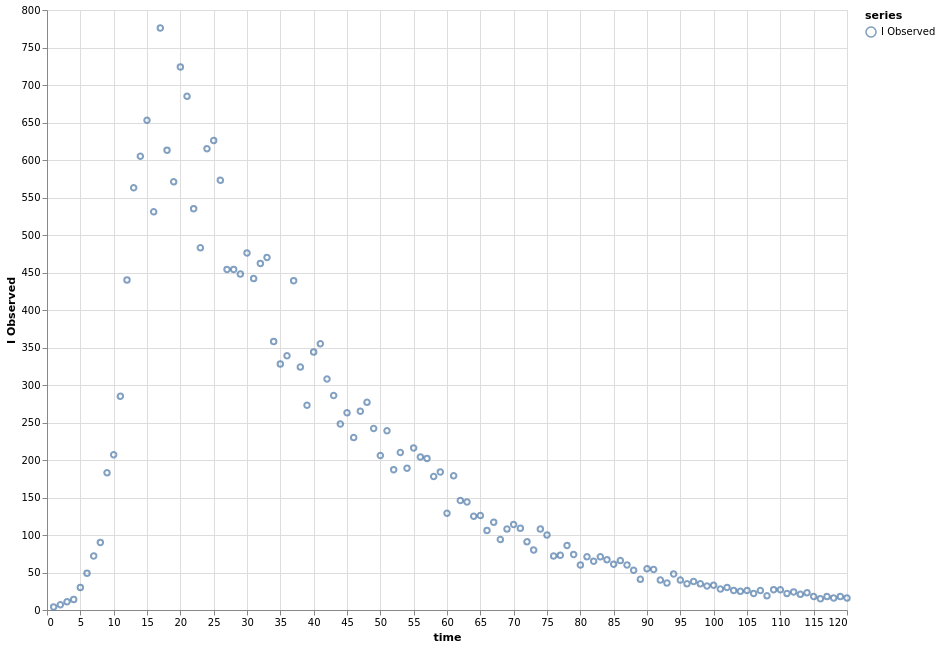

In [40]:
observed_I_series = series(value(observed.I),  "I Observed", {{ style = "points"}})
plot("Observed I", [observed_I_series], time(observed), "time")

## Fitting

The data in `observed` seems similar to the output of our `sir` model defined earlier - we can `simulate` `sir` at the same times used in `observed` to obtain a prediction for the same span of time

In [41]:
sir_vals = simulate(sir at time(observed))

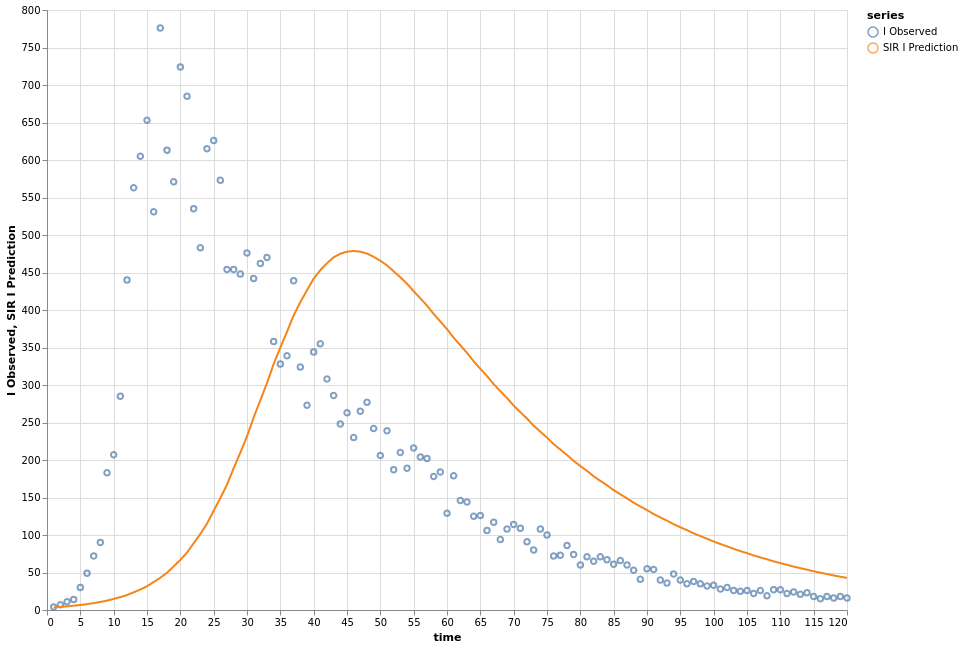

In [42]:
sir_I_series = series(value(sir_vals.I), "SIR I Prediction", {{ style = "Lines"}})
observed_I_series = series(value(observed.I),  "I Observed", {{ style = "points"}})
plot("SIR vs observed", [observed_I_series, sir_I_series], time(observed), "time")

The model has a similar shape to the data but it is a poor fit.  We can use _fitting_ to search the parameter space of the `sir` model to try to find parameters that will improve the performance of the model with respect to the data.  We use the `fit` function to do this, which is applied to:

- A model
- A point representing the observed data and how it corresponds to the model variables
- A list of parameters to try to fit

In [43]:
sir_fit = fit(sir, {{time = time(observed), I = value(observed.I) }}, ["beta"])

The result of `fit` is a point containint two components - the estimated value of the parameters (`values`) and the fitting error (`error`):

In [44]:
sir_fit

{{values={{beta=0.5155188699774484}}, errors={{beta=null}}}}

We can use `withParam` to define a new `SIR` with a different parameterization - note the value of `beta`:

In [45]:
sir_withFit = withParams(sir, sir_fit.values)
describeModel(sir_withFit)

|Name|State/Param|Data Type|Value|
|---|---|---|---|
|I_init|parameter|Real|3.0|
|R_init|parameter|Real|0.0|
|S_init|parameter|Real|997.0|
|beta|parameter|Real|0.5155188699774484|
|gamma|parameter|Real|4.0e-2|
|I|state|Real|I_init|
|R|state|Real|R_init|
|S|state|Real|S_init|
|N|state|Real|S + I + R|

We can then simulate this model and add the results to our plot - the fit has improved considerably:

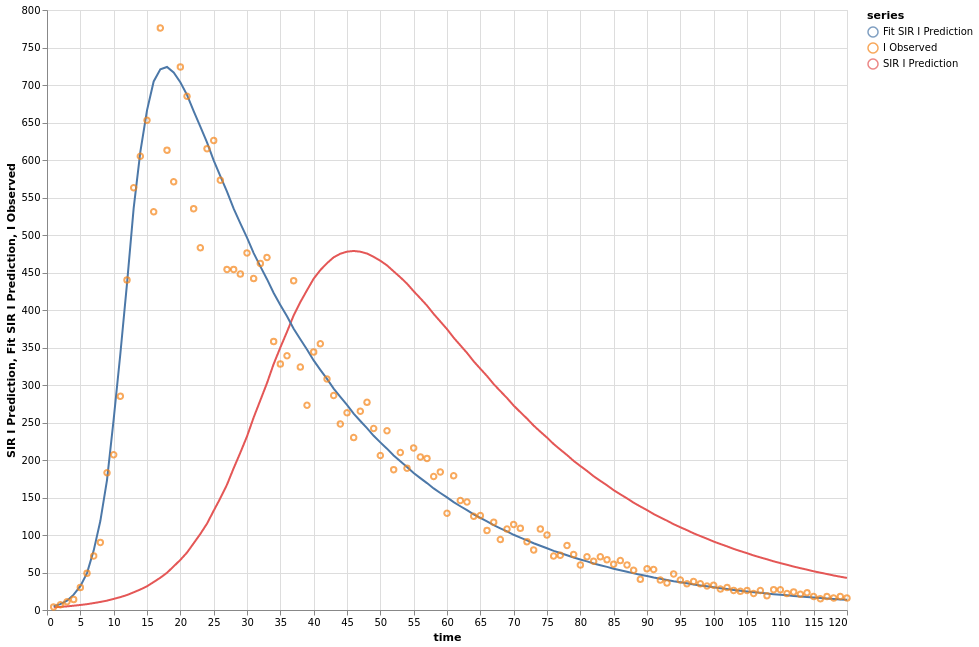

In [46]:
sir_fit_vals = simulate(sir_withFit at time(observed))
sir_fit_series = series(value(sir_fit_vals.I), "Fit SIR I Prediction", {{ style = "Lines" }})
plot("SIR vs observed", [sir_I_series, sir_fit_series, observed_I_series], time(observed), "time")

## Model Composition

The current implementation of Exposure contains limited functionality for composing models that use state sharing.  This is implemented using the `join` function which accepts:

- A pair (2 element array) of a string prefix and a model
- Another pair of a string prefix and a model
- An array of pairs of states to be joined 

Suppose we have another variant of `SIR` model, this time with vital dynamics and hospitalization:

|Name|State/Param|Data Type|Value|
|---|---|---|---|
|beta|parameter|Real|0.8|
|d|parameter|Real|5.0e-3|
|dh|parameter|Real|5.0e-2|
|di|parameter|Real|1.0e-2|
|gamma|parameter|Real|0.333|
|nu|parameter|Real|0.4|
|pHosp|parameter|Real|0.2|
|sigma|parameter|Real|0.6|
|Dead|state|Real|0.0|
|Exposed|state|Real|0.0|
|Hospitalized|state|Real|0.0|
|Infected|state|Real|1.0|
|Recovered|state|Real|0.0|
|Susceptible|state|Real|997.0|
|population|state|Real|Susceptible + Recovered + Infected + Exposed + Hospitalized|

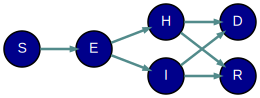

In [47]:
seird = loadESL("models/seird_hosp.easel")
describeModel(seird)
modelGraph(seird)

We can create a double epidemic model using `join` - for example, we can `join` with `sir_withParams` giving the `sir_withFit` model the prefix `a_` and the `seird` model the prefix `b` in the composed model:

In [48]:
double_epidemic = 
  join(["a_", sir_withFit],
       ["b_", seird],
       [["S", "Susceptible"]])
describeModel(double_epidemic)

|Name|State/Param|Data Type|Value|
|---|---|---|---|
|a_I_init|parameter|Real|3.0|
|a_R_init|parameter|Real|0.0|
|a_S_init|parameter|Real|997.0|
|a_beta|parameter|Real|0.5155188699774484|
|a_gamma|parameter|Real|4.0e-2|
|b_beta|parameter|Real|0.8|
|b_d|parameter|Real|5.0e-3|
|b_dh|parameter|Real|5.0e-2|
|b_di|parameter|Real|1.0e-2|
|b_gamma|parameter|Real|0.333|
|b_nu|parameter|Real|0.4|
|b_pHosp|parameter|Real|0.2|
|b_sigma|parameter|Real|0.6|
|S|state|Real|a_S_init|
|a_I|state|Real|a_I_init|
|a_R|state|Real|a_R_init|
|b_Dead|state|Real|0.0|
|b_Exposed|state|Real|0.0|
|b_Hospitalized|state|Real|0.0|
|b_Infected|state|Real|1.0|
|b_Recovered|state|Real|0.0|
|a_N|state|Real|a_I + S + a_R|
|b_population|state|Real|b_Recovered + b_Infected + b_Exposed + S + b_Hospitalized|

The naming convention makes the graph look a bit strange in that every state is named, but it does display the provenance of each state in the joined model:

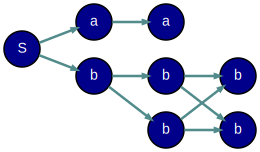

In [49]:
modelGraph(double_epidemic)

An improved syntax for expressing model composition is under development supporting more of the model composition features of AMIDOL.  In it, we might render the above composition as:

```
double_epidemic =
    compose
        a = model sir
        b = model seird
        S = share a.S with b.S
    end
```


## Model Decompositon/Simplification

Consider the following model:

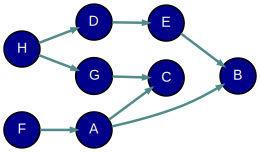

states: 8   events: 8

In [50]:
define abc
    let F = 1000
    let H = 1000
    0.4, A --> B
    0.3, A --> C
    0.6, D --> E
    0.4, E --> B
    0.2, F --> A
    0.7, G --> C
    0.8, H --> G
    0.9, H --> D
end

modelGraph(abc)
modelSize(abc)

Depending on what we're interested in measuring, we could considerably simplify this model.  For example, if we want to measure `A` there is really no reason to keep track of `H`.  Exposure supports this through the `simplify` function which accepts:

- A model
- A list of states (as strings) of interest

If we simplify the above model to what is needed just to measure `A` we arrive at a much smaller and simpler model which also has better execution characteristics:

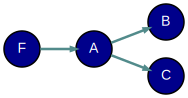

states: 4   events: 3

In [51]:
abc_simpl = simplify(abc, ["A"])
modelGraph(abc_simpl)
modelSize(abc_simpl)

Simulating both models shows that they behave nearly identically with respect to `A` - the difference at some points likely being the result of floating point error:

In [52]:
abc_times = [0 .. 25 by 2.5]
abc_sim = simulate(abc at abc_times)
abc_simpl_sim = simulate(abc_simpl at abc_times)

table(["time", "A (original)", "A (simplified)"], [abc_times, value(abc_sim.A), value(abc_simpl_sim.A)])

|time|A (original)|A (simplified)|
|---|---|---|
|0|0|0|
|2.5|173.10268650505103|173.10268650505725|
|5|135.07282309971163|135.07282309971276|
|7.5|87.15305669971536|87.15305669971556|
|10|53.76936050842674|53.76936050842677|
|12.5|32.770614919513775|32.770614919513775|
|15|19.903812767405668|19.903812767405668|
|17.5|12.077039321970457|12.077039321970457|
|20|7.325922944005954|7.325922944005954|
|22.5|4.443540816087022|4.443540816087022|
|25|2.6951687556375243|2.6951687556375243|

## Model Skill Assessment

Exposure has some built-in functionality for ranking which of a collection of models best fits some data using a methodology based on Weighted Interval Score (WIS).  To demonstrate this, we will first load some data which will be used to rank the models:

In [53]:
skill_data = loadCSV("sirs-simulated.csv")
skill_data_times = skill_data.time
infected_ground_truth = value(skill_data.I)

Next, the models themselves:

In [54]:
model1 = loadESL("sir.easel")
model2 = loadESL("sir-vd.easel")
model3 = loadESL("sirs.easel")

We then sample from the models to collect data to be used to rank them:

In [55]:
nSamples = 200
model1_samples = value(sample(model1.I at skill_data_times, nSamples))
model2_samples = value(sample(model2.I at skill_data_times, nSamples))
model3_samples = value(sample(model3.I at skill_data_times, nSamples))

We can now compute the ranking using the `modelSkillRank` function which accepts:

- An array of model sample arrays
- An array of predictive intervals (also known as alpha) to use for the ranking
- The data the model performance is to be judged against

In [56]:
alphas = [0.02, 0.05, 0.1, 0.2, 0.4, 0.8]
ranks = modelSkillRank([model1_samples, model2_samples, model3_samples], 
                        alphas, 
                        infected_ground_truth)

table(["model", "mean score"], [["model1", "model2", "model3"], ranks])

|model|mean score|
|---|---|
|model1|0.3|
|model2|0.4|
|model3|0.8|

From this we can conclude that `model3` is the one that best fits the data, and we can use a `plot` to validate this visually.  Note the closeness between the 'Model 3' line and the 'Truth' points:

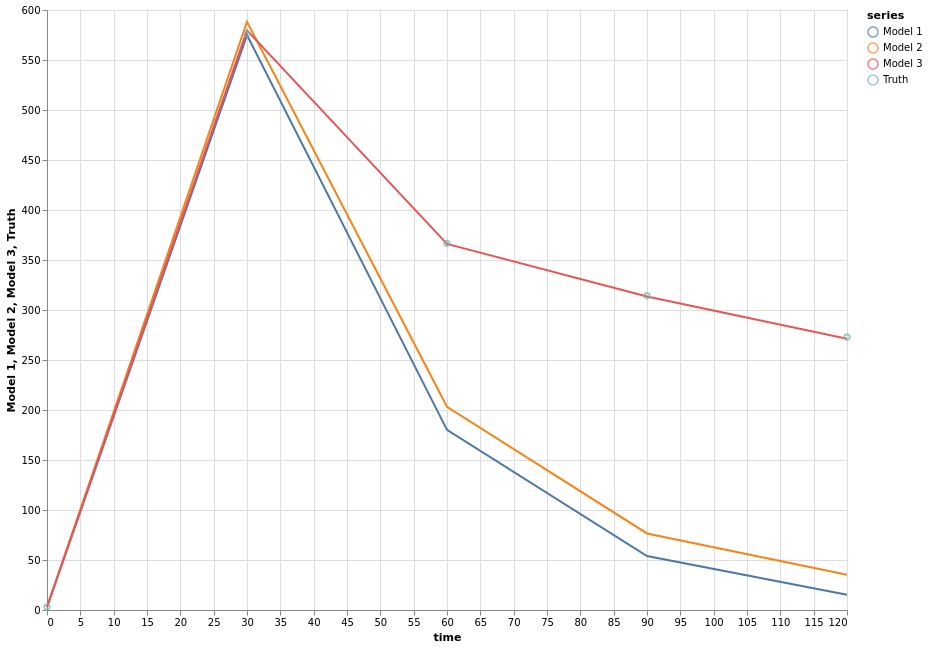

In [57]:
m1_series = series(mean(model1_samples), "Model 1", {{style="line"}})
m2_series = series(mean(model2_samples), "Model 2", {{style="line"}})
m3_series = series(mean(model3_samples), "Model 3", {{style="line"}})
ground_truth_series = series(infected_ground_truth, "Truth", {{style="points"}})

plot("Models vs. Actual", 
     [m1_series, m2_series, m3_series, ground_truth_series],
     skill_data_times,
     "time")